In [2]:
import os
from fnmatch import fnmatch
import pandas as pd
import re
import tqdm
import plotnine as p9
import patchworklib as pw
import numpy as np

<Figure size 72x72 with 0 Axes>

In [3]:
def dict_from_path(path: str):
    params_name_pattern = "([a-zA-Z]*)-"
    param_names = [path[m.start():m.end()-1] for m in re.finditer(params_name_pattern, path)]
    dict = {}
    for param in param_names:
        dict[param] = 0
    return dict

In [4]:
def construct_regex_string(path: str, names: dict):
    res: str = ""
    last_key = list(names.keys())[-1]
    for key in list(names.keys()):
        res = res + key + "-([0-9.]*)"
        if key != last_key:
            res = res + '_'
    return res

In [5]:
def extract_parms(filepath: str):
    param_st = filepath.split('/')[-2]
    params = dict_from_path(param_st)
    regex_str = construct_regex_string(param_st, params)
    result = re.search(regex_str, param_st)
    keys = list(params.keys())
    for x, key in enumerate(keys):
        params[key] = float(result.group(x+1))
    return params

In [26]:
root = os.path.join(os.getcwd(),'output_well_mixed')
pattern = "logger_6_Ve.csv"
file_paths = []
dfsV = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            file_path = os.path.join(path, name)
            file_paths.append(file_path)
            df = pd.read_csv(file_path, sep='\t')
            params = extract_parms(file_path)
            add = True
            for key in list(params.keys()):
                if round(params[key],1) != 999.0 and round(params[key],1) % 0.2 != 0:
                    add = False
                    continue
                df[key] = round(params[key],1)
            if add == True:
                dfsV.append(df)

In [ ]:
# sim = pd.concat(dfs)
# sim = sim[sim['time'] >= 10]
# simI = sim.groupby(['DV','bcf','pi','cv','time']).agg({'celltype.infected.size':['mean','std']})
# simI.columns = ["_".join(x) for x in simI.columns.ravel()]
# simI = simI.rename({'celltype.infected.size_mean':'mean','celltype.infected.size_std':'std'}, axis='columns')
# simI = simI.reset_index()
# #simI = simI.query('bcf > 0.8 and pi > 0.8 and cv > 0.8')
# simI['cv_cat'] = simI['cv'].astype("category")
# simI

In [24]:
# simV = pd.concat(dfsV)
# simV = simV[simV["10"] != 10]
# simV['time'] = np.tile(np.repeat(range(0,51),10),int(len(simV.index)/510))
# simV['sum_V_x'] = simV.iloc[:, 1:11].sum(axis=1)
# simV = simV.drop(columns=[str(x) for x in range(0,11)])
# simV = simV.groupby(list(simV.columns[:-1])).agg({'sum_V_x': 'sum'}).reset_index()
# simV = simV.groupby(['DV','bcf','pi','cv','time']).agg({'sum_V_x':['mean','std']})
# simV.columns = ["_".join(x) for x in simV.columns.ravel()]
# simV = simV.rename({'sum_V_x_mean':'mean','sum_V_x_std':'std'}, axis='columns')
# simV['cv_cat'] = simV['cv'].astype("category")
# simV

,10,0,1,2,3,4,5,6,7,8,9,DV,bcf,pi,cv,time,sum_V_x
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.4,0.2,0.2,0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.4,0.2,0.2,0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.4,0.2,0.2,0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.4,0.2,0.2,0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.4,0.2,0.2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.8,0.4,0.8,50,0.0
556,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.8,0.4,0.8,50,0.0
557,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.8,0.4,0.8,50,0.0
558,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,0.8,0.4,0.8,50,0.0


In [7]:
timesteps=50
def calculate_V(df: pd.DataFrame):
    df = df[df["10"]!=10]
    morpheus_ts = np.repeat(range(0,timesteps+1),10)
    df["time"] = np.tile(morpheus_ts,int(len(df.index)/morpheus_ts.shape[0]))
    df['sum_V'] = df.iloc[:, 1:11].sum(axis=1)
    df = df.drop(columns=[str(x) for x in range(0,11)])
    df = df.groupby(list(df.columns[:-1])).agg({'sum_V': 'sum'}).reset_index()
    return df

In [8]:
plots_V = []
for dv in simI['DV'].unique():
    plot = (p9.ggplot(simI[simI['DV'] == dv], p9.aes(x='time', color='cv_cat'))
            + p9.geom_line(p9.aes(y='mean', color='cv_cat'))
            + p9.geom_ribbon(p9.aes(ymin='mean - std', ymax='mean + std'),alpha=0.2)
            + p9.facet_grid('bcf ~ pi', labeller = 'label_both')
            )
    plots_V.append(pw.load_ggplot(plot))
print("nr of plots: " + str(len(simI['DV'].unique())))

nr of plots: 1


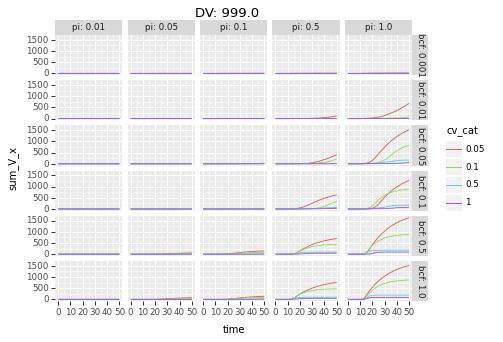

In [9]:
figure = plots_V[0]
figure.savefig()

In [8]:
root = os.path.join(os.getcwd(),'output_well_mixed')
pattern = "logger_2.csv"
file_paths = []
dfs = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            file_path = os.path.join(path, name)
            file_paths.append(file_path)
            df = pd.read_csv(file_path, sep='\t')
            params = extract_parms(file_path)
            add = True
            for key in list(params.keys()):
                if round(params[key],1) != 999.0 and round(params[key],1) % 0.2 != 0:
                    add = False
                    continue
                df[key] = round(params[key],1)
            if add == True:
                dfs.append(df)

In [9]:
sim = pd.concat(dfs)

In [ ]:
# sim = pd.concat(dfs)
# sim = sim[sim['time'] >= 10]
# simI = sim.groupby(['DV','bcf','pi','cv','time']).agg({'celltype.infected.size':['mean','std']})
# simI.columns = ["_".join(x) for x in simI.columns.ravel()]
# simI = simI.rename({'celltype.infected.size_mean':'mean','celltype.infected.size_std':'std'}, axis='columns')
# simI = simI.reset_index()
# simI['cond'] = 'b:' + simI['bcf'].astype(str) + ' ' + 'pi:' + simI['pi'].astype(str) + ' ' + 'cv:' + simI['cv'].astype(str)
# simI

In [13]:
sim = pd.concat(dfs)
sim = sim[sim['time'] >= 10]
simI = sim.groupby(['DV','bcf','pi','cv','time']).agg({'celltype.infected.size':['mean','std']})
simI.columns = ["_".join(x) for x in simI.columns.ravel()]
simI = simI.rename({'celltype.infected.size_mean':'mean','celltype.infected.size_std':'std'}, axis='columns')
simI = simI.reset_index()
#simI = simI.query('bcf > 0.8 and pi > 0.8 and cv > 0.8')
simI['cv_cat'] = simI['cv'].astype("category")
simI

,DV,bcf,pi,cv,time,mean,std,cv_cat
0,999.0,0.0,0.0,0.2,10,1.0,NaN,0.2
1,999.0,0.0,0.0,0.2,11,1.0,NaN,0.2
2,999.0,0.0,0.0,0.2,12,1.0,NaN,0.2
3,999.0,0.0,0.0,0.2,13,1.0,NaN,0.2
4,999.0,0.0,0.0,0.2,14,1.0,NaN,0.2
...,...,...,...,...,...,...,...,...
2209,999.0,0.8,0.8,0.8,46,50.0,0.0,0.8
2210,999.0,0.8,0.8,0.8,47,50.0,0.0,0.8
2211,999.0,0.8,0.8,0.8,48,50.0,0.0,0.8
2212,999.0,0.8,0.8,0.8,49,50.0,0.0,0.8


In [66]:
# plots = []
# for dv in simI['DV'].unique():
#     for bcf in simI['bcf'].unique():
#         for pi in simI['pi'].unique():
#             plot = (p9.ggplot(simI.query('DV == @dv and bcf == @bcf and pi == @pi'), p9.aes(x='time'))
#                     + p9.geom_ribbon(p9.aes(ymin='mean - std', ymax='mean + std'),alpha=0.2)
#                     + p9.facet_grid('. ~ cond')
#                     #+ p9.labs(title="DV: " + str(dv) + " bcf: " + str(bcf) + " pi: " + str(pi))
#                     )
#             plots.append(pw.load_ggplot(plot))
# print("nr of plots: " + str(len(simI['DV'].unique())))

In [18]:
plots = []
for dv in simI['DV'].unique():
    plot = (p9.ggplot(simI[simI['DV'] == dv], p9.aes(x='time', color='cv_cat'))
            + p9.geom_line(p9.aes(y='mean', color='cv_cat'))
            + p9.geom_ribbon(p9.aes(ymin='mean - std', ymax='mean + std'),alpha=0.2)
            + p9.facet_grid('bcf ~ pi', labeller = 'label_both')
            )
    plots.append(pw.load_ggplot(plot))
print("nr of plots: " + str(len(simI['DV'].unique())))

nr of plots: 1


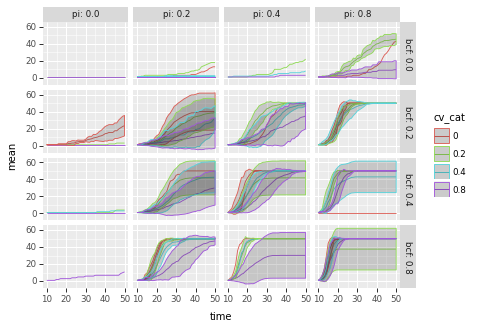

In [19]:
figure = plots[0]
figure.savefig()

In [15]:
root = os.path.join(os.getcwd(),'output_well_mixed')
pattern = "logger_6_Ve.csv"
file_paths = []
dfsV = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            file_path = os.path.join(path, name)
            file_paths.append(file_path)
            df = pd.read_csv(file_path, sep='\t')
            params = extract_parms(file_path)
            for key in list(params.keys()):
                df[key] = params[key]
            dfsV.append(df)

In [16]:
simV = pd.concat(dfsV)
simV = simV[simV["10"] != 10]
simV['time'] = np.tile(np.repeat(range(0,51),10),int(len(simV.index)/510))
simV['sum_V_x'] = simV.iloc[:, 1:11].sum(axis=1)
simV = simV.drop(columns=[str(x) for x in range(0,11)])
simV = simV.groupby(list(simV.columns[:-1])).agg({'sum_V_x': 'sum'}).reset_index()
simV

,DV,bcf,pi,cv,time,sum_V_x
0,999.0,0.001,0.01,0.05,0,0.0
1,999.0,0.001,0.01,0.05,1,0.0
2,999.0,0.001,0.01,0.05,2,0.0
3,999.0,0.001,0.01,0.05,3,0.0
4,999.0,0.001,0.01,0.05,4,0.0
...,...,...,...,...,...,...
6115,999.0,1.000,1.00,1.00,46,87.0
6116,999.0,1.000,1.00,1.00,47,87.0
6117,999.0,1.000,1.00,1.00,48,87.0
6118,999.0,1.000,1.00,1.00,49,87.0


In [17]:
plots_V = []
for cv in sim['cv'].unique():
    for pi in sim['pi'].unique():
        plot = (p9.ggplot(simV[simV['DV'] == dv], p9.aes(x='time', color='bcf'))
                + p9.geom_line(p9.aes(y='sum_V_x'))
                )
    plots_V.append(pw.load_ggplot(plot))
print("nr of plots: " + str(len(simV['DV'].unique())))

nr of plots: 1


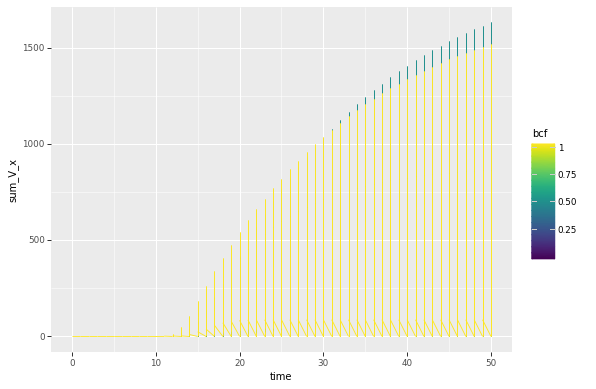

In [18]:
figure = plots_V[0]
figure.savefig()